In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
import re
import spacy

## Dataset

In [3]:
df = pd.read_csv("balanced_animal_mountain_dataset.csv")
df

,text,marker
0,The sound of a lynx echoed through the dense f...,"[15, 19]"
1,The guinea pig is known for its agility and sh...,"[4, 14]"
2,The jaguar is known for its agility and sharp ...,"[4, 10]"
3,Many tourists visit the park to see a wild cat.,"[43, 46]"
4,A group of researchers studied the hamster in ...,"[35, 42]"
...,...,...
1595,Listening to live punk rock music at an underg...,[]
1596,For most everyone answer all. Another sit char...,[]
1597,Mount Fuji is an iconic symbol of Japan and a ...,[]
1598,Many stuff station stuff. Consider interview l...,[]


## EDA

In [4]:
df['class'] = df['marker'].apply(lambda x: 'animal' if eval(x) else 'non_animal')
df

,text,marker,class
0,The sound of a lynx echoed through the dense f...,"[15, 19]",animal
1,The guinea pig is known for its agility and sh...,"[4, 14]",animal
2,The jaguar is known for its agility and sharp ...,"[4, 10]",animal
3,Many tourists visit the park to see a wild cat.,"[43, 46]",animal
4,A group of researchers studied the hamster in ...,"[35, 42]",animal
...,...,...,...
1595,Listening to live punk rock music at an underg...,[],non_animal
1596,For most everyone answer all. Another sit char...,[],non_animal
1597,Mount Fuji is an iconic symbol of Japan and a ...,[],non_animal
1598,Many stuff station stuff. Consider interview l...,[],non_animal


In [5]:
df_animal = df[df['class'] == 'animal']
df_animal

,text,marker,class
0,The sound of a lynx echoed through the dense f...,"[15, 19]",animal
1,The guinea pig is known for its agility and sh...,"[4, 14]",animal
2,The jaguar is known for its agility and sharp ...,"[4, 10]",animal
3,Many tourists visit the park to see a wild cat.,"[43, 46]",animal
4,A group of researchers studied the hamster in ...,"[35, 42]",animal
...,...,...,...
795,The sound of a cheetah echoed through the dens...,"[15, 22]",animal
796,A group of researchers studied the coyote in i...,"[35, 41]",animal
797,The chimpanzee is known for its agility and sh...,"[4, 14]",animal
798,A baby wolf was rescued and taken to a wildlif...,"[7, 11]",animal


In [6]:
df_not_animal = df[df['class'] == 'non_animal']
df_not_animal

,text,marker,class
800,Affect name give technology. Help value accept...,[],non_animal
801,About floor building remember case administrat...,[],non_animal
802,Sampling different varieties of cheese at a ch...,[],non_animal
803,Exploring a riverfront promenade with scenic v...,[],non_animal
804,Exploring a science museum and interactive exh...,[],non_animal
...,...,...,...
1595,Listening to live punk rock music at an underg...,[],non_animal
1596,For most everyone answer all. Another sit char...,[],non_animal
1597,Mount Fuji is an iconic symbol of Japan and a ...,[],non_animal
1598,Many stuff station stuff. Consider interview l...,[],non_animal


As we can see, first 50% of rows are sentences with animals, another 50% of rows are sentences without animals

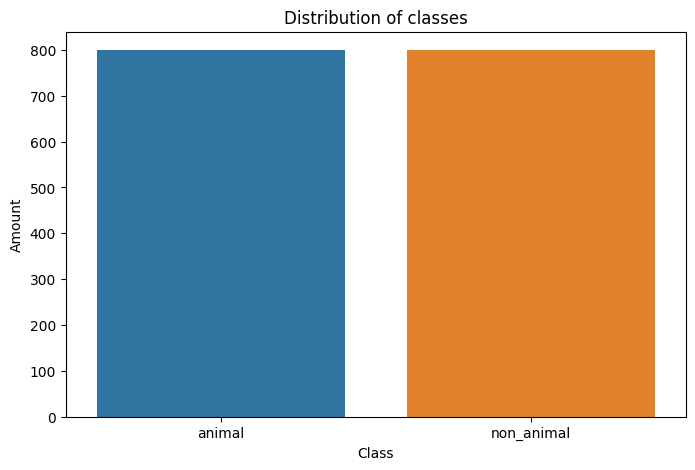

In [7]:

plt.figure(figsize=(8, 5))
sns.countplot(x=df['class'])
plt.title("Distribution of classes")
plt.xlabel("Class")
plt.ylabel("Amount")
plt.show()

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


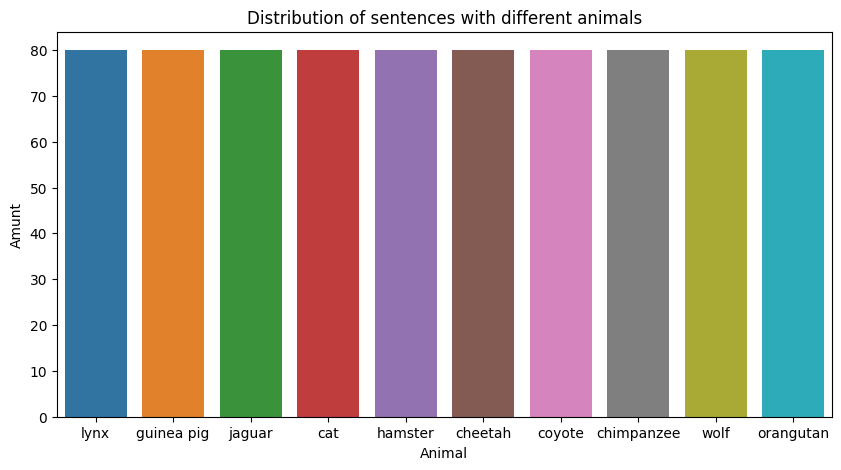

In [8]:
animals = ["lynx", "guinea pig", "jaguar", "cat", "hamster", "cheetah", "coyote", "chimpanzee", "wolf", "orangutan"]
animal_counts = {animal: df['text'].str.contains(rf'\b{animal}\b', case=False).sum() for animal in animals}

plt.figure(figsize=(10, 5))
sns.barplot(x=list(animal_counts.keys()), y=list(animal_counts.values()))
plt.title("Distribution of sentences with different animals")
plt.xlabel("Animal")
plt.ylabel("Amunt")
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


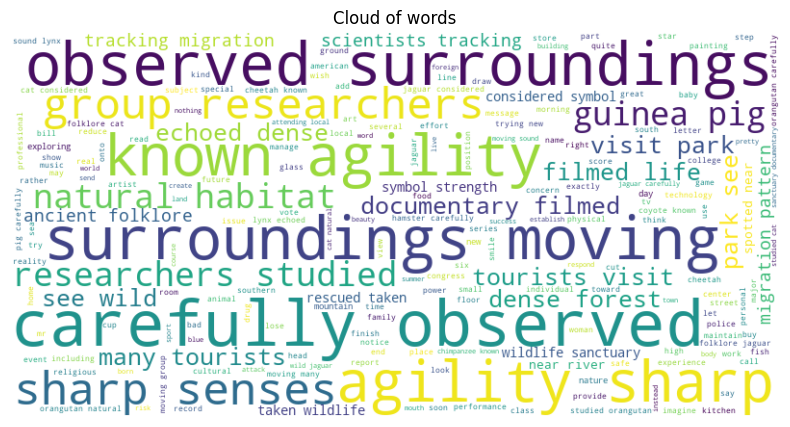

In [9]:
text_data = " ".join(df['text']).lower()
text_data_clean = re.sub(r'[^a-zA-Z ]', '', text_data)
words = text_data_clean.split()
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(filtered_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Cloud of words")
plt.show()


In [10]:
df.drop(columns=['class'], inplace=True)
df.head()

,text,marker
0,The sound of a lynx echoed through the dense f...,"[15, 19]"
1,The guinea pig is known for its agility and sh...,"[4, 14]"
2,The jaguar is known for its agility and sharp ...,"[4, 10]"
3,Many tourists visit the park to see a wild cat.,"[43, 46]"
4,A group of researchers studied the hamster in ...,"[35, 42]"


## NER

As 50% of first rows are sentences with animals and another 50% of rows are sentences without animal, there is a little bit specific train/test split.

In [11]:
from sklearn.model_selection import train_test_split
df_animal_train, df_animal_test = train_test_split(df_animal, test_size=0.2, random_state=42, shuffle=True)
df_not_animal_train, df_not_animal_test = train_test_split(df_not_animal, test_size=0.2, random_state=42, shuffle=True)

df_train_first = pd.concat([df_animal_train, df_not_animal_train]).sample(frac=1, random_state=42).reset_index(drop=True)
df_test = pd.concat([df_animal_test, df_not_animal_test]).sample(frac=1, random_state=42).reset_index(drop=True)


In [12]:
df_train, df_validation = train_test_split(df_train_first, test_size=0.2, random_state=42, shuffle=True)

In [13]:
from spacy.util import filter_spans
import spacy
from spacy.tokens import DocBin
from tqdm import tqdm
import ast

nlp = spacy.blank("en")
doc_bin = DocBin()

for _, row in tqdm(df_train.iterrows(), total=len(df_train)): 
    text = row['text']
    marker = ast.literal_eval(row['marker']) if isinstance(row['marker'], str) else row['marker']
    doc = nlp.make_doc(text) 
    ents = []
    
    if marker:
        start, end = marker[0], marker[1]
        span = doc.char_span(start, end, label="ANIMAL", alignment_mode="contract")
        if span is None:
            print(f"Skipping entity in: {text}")
        else:
            ents.append(span)
    
    filtered_ents = filter_spans(ents)
    doc.ents = filtered_ents 
    doc_bin.add(doc)

doc_bin.to_disk("animal_training_data.spacy")

100%|██████████| 1024/1024 [00:02<00:00, 377.45it/s]


In [14]:
doc_bin = DocBin().from_disk("animal_training_data.spacy")
docs = list(doc_bin.get_docs(nlp.vocab))

for doc in docs[:5]:
    print(f"Text: {doc.text}")
    print("Information:", [(ent.text, ent.start_char, ent.end_char, ent.label_) for ent in doc.ents])
    print("-" * 50)


Text: Onto loss card onto. Center home also believe us.
Information: []
--------------------------------------------------
Text: Office onto skill without live effort long. Maintain leave drive each. Small significant mention will responsibility college true.
Fast place PM eat.
Information: []
--------------------------------------------------
Text: A baby hamster was rescued and taken to a wildlife sanctuary.
Information: [('hamster', 7, 14, 'ANIMAL')]
--------------------------------------------------
Text: Theory feeling both effect. Nice support near head suggest there thing. Much work main out apply.
Information: []
--------------------------------------------------
Text: Leader Congress bill wife become cup. Fire natural truth similar. Purpose work college bad manage.
Information: []
--------------------------------------------------


In [15]:
nlp = spacy.blank("en")
doc_bin = DocBin()

for _, row in tqdm(df_validation.iterrows(), total=len(df_validation)):
    text = row['text']
    marker = ast.literal_eval(row['marker']) if isinstance(row['marker'], str) else row['marker']
    doc = nlp.make_doc(text) 
    ents = []
    
    if marker:
        start, end = marker[0], marker[1]
        span = doc.char_span(start, end, label="ANIMAL", alignment_mode="contract")
        if span is None:
            print(f"Skipping entity in: {text}")
        else:
            ents.append(span)
    
    filtered_ents = filter_spans(ents)
    doc.ents = filtered_ents 
    doc_bin.add(doc)

doc_bin.to_disk("animal_validation_data.spacy")


100%|██████████| 256/256 [00:00<00:00, 394.38it/s]


In [16]:
doc_bin = DocBin().from_disk("animal_validation_data.spacy")
docs = list(doc_bin.get_docs(nlp.vocab))

for doc in docs[:5]:
    print(f"Text: {doc.text}")
    print("Information:", [(ent.text, ent.start_char, ent.end_char, ent.label_) for ent in doc.ents])
    print("-" * 50)

Text: A documentary was filmed about the life of a cat.
Information: [('cat', 45, 48, 'ANIMAL')]
--------------------------------------------------
Text: The guinea pig was spotted near the river.
Information: [('guinea pig', 4, 14, 'ANIMAL')]
--------------------------------------------------
Text: A baby lynx was rescued and taken to a wildlife sanctuary.
Information: [('lynx', 7, 11, 'ANIMAL')]
--------------------------------------------------
Text: Woman even may. Hand few save. Themselves would simple step by.
Information: []
--------------------------------------------------
Text: Bar produce sell have surface realize opportunity. Story save center throughout event life key. Something me senior community.
Information: []
--------------------------------------------------


In [17]:
nlp = spacy.blank("en")
doc_bin = DocBin()

for _, row in tqdm(df_test.iterrows(), total=len(df_test)):
    text = row['text']
    marker = ast.literal_eval(row['marker']) if isinstance(row['marker'], str) else row['marker']
    doc = nlp.make_doc(text) 
    ents = []
    
    if marker:
        start, end = marker[0], marker[1]
        span = doc.char_span(start, end, label="ANIMAL", alignment_mode="contract")
        if span is None:
            print(f"Skipping entity in: {text}")
        else:
            ents.append(span)
    
    filtered_ents = filter_spans(ents)
    doc.ents = filtered_ents 
    doc_bin.add(doc)

doc_bin.to_disk("animal_test_data.spacy")



100%|██████████| 320/320 [00:00<00:00, 369.99it/s]


In [18]:
doc_bin = DocBin().from_disk("animal_test_data.spacy")
docs = list(doc_bin.get_docs(nlp.vocab))

for doc in docs[:5]:
    print(f"Text: {doc.text}")
    print("Information:", [(ent.text, ent.start_char, ent.end_char, ent.label_) for ent in doc.ents])
    print("-" * 50)

Text: The advent of 5G technology promises faster and more reliable wireless communication.
Information: []
--------------------------------------------------
Text: Worry thing rate order no add. Among front decade bad cause suddenly look eat. Course traditional draw behavior area room heavy.
Information: []
--------------------------------------------------
Text: The lynx carefully observed its surroundings before moving.
Information: [('lynx', 4, 8, 'ANIMAL')]
--------------------------------------------------
Text: The coyote is known for its agility and sharp senses.
Information: [('coyote', 4, 10, 'ANIMAL')]
--------------------------------------------------
Text: The coyote is known for its agility and sharp senses.
Information: [('coyote', 4, 10, 'ANIMAL')]
--------------------------------------------------


In [19]:
# !python -m spacy init config config.cfg --lang en --pipeline ner --optimize efficiency

In [20]:
!python -m spacy train config.cfg --output ./output --paths.train animal_training_data.spacy --paths.dev animal_validation_data.spacy

ℹ Saving to output directory: output
ℹ Using CPU

=========================== Initializing pipeline ===========================
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'ner']
ℹ Initial learn rate: 5e-05
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
  0       0          0.00     41.50    0.00    0.00    0.00    0.00
  1     200         19.02   7606.28    0.00    0.00    0.00    0.00
  3     400          9.07    714.13   86.17   85.83   86.51    0.86
  5     600          0.82     32.72   99.60   99.21  100.00    1.00
  8     800          0.03      0.12   99.60   99.21  100.00    1.00
 11    1000          0.08      0.21   99.60   99.21  100.00    1.00
 15    1200          0.01      0.02   99.60   99.21  100.00    1.00
 20    1400          0.00      0.00  100.00  100.00  100.00    1.00
 26    1600          0.01      

In [21]:
!python -m spacy debug data config.cfg


============================ Data file validation ============================
✔ Pipeline can be initialized with data
✔ Corpus is loadable

=============================== Training stats ===============================
Language: en
Training pipeline: tok2vec, ner
1024 training docs
256 evaluation docs
⚠ 75 training examples also in evaluation data
⚠ Low number of examples to train a new pipeline (1024)

============================== Vocab & Vectors ==============================
ℹ 14263 total word(s) in the data (2253 unique)
ℹ No word vectors present in the package

========================== Named Entity Recognition ==========================
ℹ 1 label(s)
0 missing value(s) (tokens with '-' label)
✔ Good amount of examples for all labels
✔ Examples without occurrences available for all labels
✔ No entities consisting of or starting/ending with whitespace
✔ No entities crossing sentence boundaries

================================== Summary ==================================
✔ 6 ch

In [22]:
nlp = spacy.load("output/model-best")
text = "Yesterday, I saw a dog in the yard."

doc = nlp(text)
print([(ent.text, ent.label_) for ent in doc.ents])


[]


In [23]:
def extract_animals(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ == "ANIMAL"]
sentence = "My mom likes cat."
animals = extract_animals(sentence)
print("Animals caught", animals)


Animals caught ['cat']


In [24]:
from spacy.tokens import DocBin
from tqdm import tqdm

nlp = spacy.load("output/model-best")

doc_bin = DocBin().from_disk("animal_validation_data.spacy")
docs = list(doc_bin.get_docs(nlp.vocab))

true_entities = set()
pred_entities = set()

for doc in tqdm(docs):
    true_ents = {(ent.text, ent.start_char, ent.end_char) for ent in doc.ents}
    true_entities.update(true_ents)

    pred_doc = nlp(doc.text)
    pred_ents = {(ent.text, ent.start_char, ent.end_char) for ent in pred_doc.ents}
    pred_entities.update(pred_ents)

TP = len(true_entities & pred_entities)
FP = len(pred_entities - true_entities)
FN = len(true_entities - pred_entities)

precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


100%|██████████| 256/256 [00:03<00:00, 83.85it/s] 

True Positives (TP): 61
False Positives (FP): 0
False Negatives (FN): 0
Precision: 1.000
Recall: 1.000
F1 Score: 1.000


In [25]:
nlp = spacy.load("output/model-best")

doc_bin_test = DocBin().from_disk("animal_test_data.spacy")
docs_test = list(doc_bin_test.get_docs(nlp.vocab))

true_entities_test = set()
pred_entities_test = set()

for doc in tqdm(docs_test):
    true_ents_test = {(ent.text, ent.start_char, ent.end_char) for ent in doc.ents}
    true_entities_test.update(true_ents_test)

    pred_doc_test = nlp(doc.text)
    pred_ents_test = {(ent.text, ent.start_char, ent.end_char) for ent in pred_doc_test.ents}
    pred_entities_test.update(pred_ents_test)

TP_test = len(true_entities_test & pred_entities_test)
FP_test = len(pred_entities_test - true_entities_test)
FN_test = len(true_entities_test - pred_entities_test)

precision_test = TP_test / (TP_test + FP_test) if (TP_test + FP_test) > 0 else 0
recall_test = TP_test / (TP_test + FN_test) if (TP_test + FN_test) > 0 else 0
f1_test = 2 * precision_test * recall_test / (precision_test + recall_test) if (precision_test + recall_test) > 0 else 0

print(f"True Positives (TP): {TP_test}")
print(f"False Positives (FP): {FP_test}")
print(f"False Negatives (FN): {FN_test}")
print(f"Precision: {precision_test:.3f}")
print(f"Recall: {recall_test:.3f}")
print(f"F1 Score: {f1_test:.3f}")


100%|██████████| 320/320 [00:03<00:00, 97.06it/s] 

True Positives (TP): 69
False Positives (FP): 1
False Negatives (FN): 0
Precision: 0.986
Recall: 1.000
F1 Score: 0.993
